## 프로젝트 개요
- 이 데이터에는 연령, 성별, 컴퓨터, 상황, 질병, 감정에 대한 정보가 들어있다. 
- 실제 서비스를 위해서 문자 내용만 가지고 감성을 파악해야하기 때문에 위의 모든 데이터를 사용할 수 없다.
- 가장 우선시 하여 사용할 데이터는 감정 > 상황 
- 대화의 내용으로 질병, 성별, 연령을 유추는 할 수 있지만 그거는 너무 디테일한 내용이다. 우선 감정과 상황을 가지고 프로젝트를 진행 후 나중에 개선을 해보도록 하자

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## data

In [2]:
# !unzip /content/drive/MyDrive/인공지능/대화속감정인식/data/Training.zip -d /content/drive/MyDrive/인공지능/대화속감정인식/data
# !unzip /content/drive/MyDrive/인공지능/대화속감정인식/data/Validation.zip -d /content/drive/MyDrive/인공지능/대화속감정인식/data

In [3]:
from tqdm import tqdm
import glob
import json
import os
import re
import csv
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
train_path = "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Training.json"
valid_path = "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Validation.json"

## 데이터 확인

In [5]:
with open(train_path) as f:
      data = json.load(f)

In [6]:
len(data)

51628

In [7]:
print(data[0])

{'profile': {'persona-id': 'Pro_05349', 'persona': {'persona-id': 'A02_G02_C01', 'human': ['A02', 'G02'], 'computer': ['C01']}, 'emotion': {'emotion-id': 'S06_D02_E18', 'type': 'E18', 'situation': ['S06', 'D02']}}, 'talk': {'id': {'profile-id': 'Pro_05349', 'talk-id': 'Pro_05349_00053'}, 'content': {'HS01': '일은 왜 해도 해도 끝이 없을까? 화가 난다.', 'SS01': '많이 힘드시겠어요. 주위에 의논할 상대가 있나요?', 'HS02': '그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.', 'SS02': '혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요. ', 'HS03': '', 'SS03': ''}}}


### 감정 데이터 확인

In [8]:
emotion_list = []
for i in range(len(data)):
  emotion_list.append(data[i]['profile']['emotion']['type'])

In [9]:
counts = Counter(emotion_list)
print(counts)

Counter({'E37': 1229, 'E13': 1054, 'E24': 1002, 'E27': 993, 'E31': 991, 'E47': 984, 'E18': 975, 'E32': 971, 'E19': 969, 'E10': 958, 'E20': 958, 'E48': 953, 'E22': 950, 'E45': 949, 'E40': 937, 'E11': 926, 'E58': 918, 'E42': 911, 'E44': 910, 'E23': 906, 'E43': 901, 'E34': 901, 'E51': 900, 'E39': 899, 'E56': 897, 'E41': 896, 'E28': 896, 'E30': 893, 'E29': 884, 'E55': 883, 'E17': 882, 'E12': 875, 'E16': 873, 'E52': 872, 'E21': 870, 'E59': 870, 'E38': 869, 'E53': 865, 'E33': 864, 'E49': 861, 'E36': 860, 'E50': 859, 'E54': 859, 'E15': 845, 'E35': 842, 'E46': 840, 'E25': 838, 'E57': 833, 'E26': 828, 'E14': 803, 'E60': 660, 'E64': 655, 'E67': 639, 'E68': 634, 'E61': 631, 'E62': 609, 'E63': 597, 'E69': 570, 'E66': 568, 'E65': 563})


#### 전체 감정

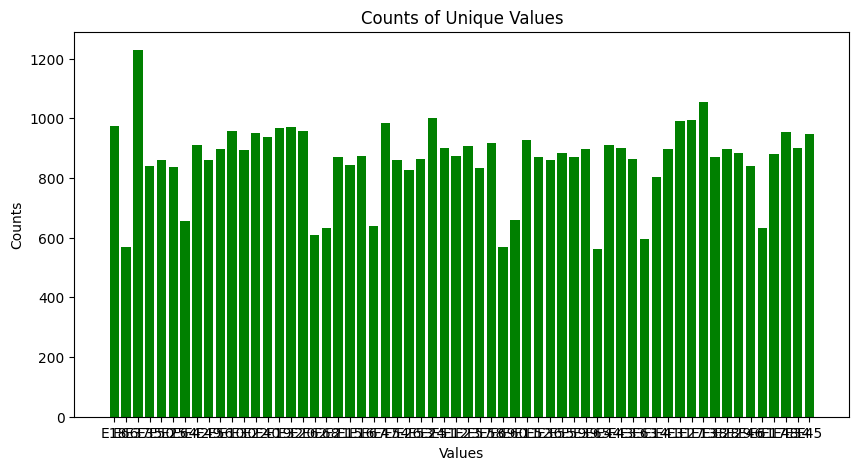

In [10]:
fig = plt.figure(figsize=(10, 5))
 
# 시각화할 데이터
x = list(counts.keys())
y = list(counts.values())
 
# bar 그래프 생성
plt.bar(x, y, color='green')
 
# 그래프 제목 설정
plt.title("Counts of Unique Values")
 
# x축과 y축 레이블 설정
plt.xlabel("Values")
plt.ylabel("Counts")
 
# 그래프 출력
plt.show()

#### 6개 감정으로 축소

In [11]:
anger_list = []
sadness_list = []
anxiety_list = []
wound_list = []
panic_list = []
joy_list = []

In [12]:
for i in range(len(data)):
  if 10 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 19:
    anger_list.append(data[i]['profile']['emotion']['type'])
  elif 20 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 29:
    sadness_list.append(data[i]['profile']['emotion']['type'])
  elif 30 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 39:
    anxiety_list.append(data[i]['profile']['emotion']['type'])
  elif 40 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 49:
    wound_list.append(data[i]['profile']['emotion']['type'])
  elif 50 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 59:
    panic_list.append(data[i]['profile']['emotion']['type'])
  elif 60 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 69:
    joy_list.append(data[i]['profile']['emotion']['type'])


In [13]:
print(len(anger_list))
print(len(sadness_list))
print(len(anxiety_list))
print(len(wound_list))
print(len(panic_list))
print(len(joy_list))

9160
9125
9319
9142
8756
6126


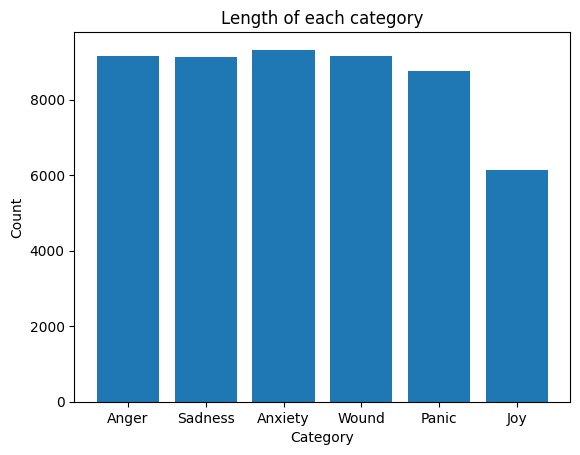

In [14]:
categories = [anger_list, sadness_list, anxiety_list, wound_list, panic_list, joy_list]
category_names = ['Anger', 'Sadness', 'Anxiety', 'Wound', 'Panic', 'Joy']

category_lengths = [len(category) for category in categories]

plt.bar(category_names, category_lengths)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Length of each category')
plt.show()

## 데이터 로더 구현하기
- 필요한 데이터
  - 대화
  - 발화자
  - 감정 
- 필요한 로직
  - 60가지로 나뉘어져 있는 감정을 6개로 바꾼다.
  - 각 문장 앞에 CLS 토큰 지정
  - 각 발화자 앞에 스페셜 토큰을 지정한다. 
    - 사람, 시스템, 사람, 시스템, 사람, 시스템 번갈아가며 나오기 때문에 특정 키 값을 가져올 필요없이 간격으로 스폐셜 토큰을 지정하면 될 것 같다.
- 데이터를 다음과 같은 형태로 만들기
  - [사람, 시스템, 사람, 시스템, 사람, 시스템, 감정]

In [15]:
import json
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, AutoTokenizer
import torch

class data_loader(Dataset):
    def __init__(self,data_path):
        self.tokenizer = AutoTokenizer.from_pretrained('klue/roberta-base')

        with open(train_path) as f:
          data = json.load(f)

        self.session_dataset  = []

        for i in range(len(data)):
          if 10 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 19:
            data[i]['profile']['emotion']['type'] = '분노'
          elif 20 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 29:
            data[i]['profile']['emotion']['type'] = '슬픔'
          elif 30 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 39:
            data[i]['profile']['emotion']['type'] = '불안'
          elif 40 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 49:
            data[i]['profile']['emotion']['type'] = '상처'
          elif 50 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 59:
            data[i]['profile']['emotion']['type'] = '당황'
          elif 60 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 69:
            data[i]['profile']['emotion']['type'] = '기쁨'

        for i in range(len(data)):
          data_values = list(data[i]['talk']['content'].values())
          values = [val for val in data_values if val != '']
          values.append(data[i]['profile']['emotion']['type'])
          self.session_dataset.append(values)

        self.special_words = ["#hh#", "#hs#"] # 발화자, 시스템
        self.tokenizer.add_special_tokens({"additional_special_tokens": self.special_words}) # 나중에 모델부분에서 스폐셜 토큰 갯수를 더 추가해서 resize를 해야함함

        self.emoList = ['분노', '슬픔', '불안', '상처', '당황', '기쁨']

    def __len__(self):
        return len(self.session_dataset)

    def __getitem__(self,idx):
        return self.session_dataset[idx]

    def padding(self, batch_input_token):
        batch_token_ids, batch_attention_masks = batch_input_token['input_ids'], batch_input_token['attention_mask']
        trunc_batch_token_ids, trunc_batch_attention_masks = [], []
        for batch_token_id, batch_attention_mask in zip(batch_token_ids, batch_attention_masks):
            if len(batch_token_id) > self.tokenizer.model_max_length: 
                # 맨 앞에 감정을 담는 인자가 있기 때문에 앞에서 부터 자른다. 
                trunc_batch_token_id = [batch_token_id[0]] + batch_token_id[1:][:self.tokenizer.model_max_length-1]
                trunc_batch_attention_mask = [batch_attention_mask[0]] + batch_attention_mask[1:][:self.tokenizer.model_max_length-1]
                trunc_batch_token_ids.append(trunc_batch_token_id)
                trunc_batch_attention_masks.append(trunc_batch_attention_mask)
            else: # 512보다 짧은 경우
                trunc_batch_token_ids.append(batch_token_id)
                trunc_batch_attention_masks.append(batch_attention_mask)
        """padding token"""
        max_length = max([len(x) for x in trunc_batch_token_ids])
        padding_tokens, padding_attention_masks = [], []
        for batch_token_id, batch_attention_mask in zip(trunc_batch_token_ids, trunc_batch_attention_masks):
            padding_tokens.append(batch_token_id + [self.tokenizer.pad_token_id for _ in range(max_length-len(batch_token_id))])
            padding_attention_masks.append(batch_attention_mask + [0 for _ in range(max_length-len(batch_token_id))])

        return torch.tensor(padding_tokens), torch.tensor(padding_attention_masks)

    def collate_fn(self, sessions):
        batch_input, batch_labels = [], [] # com입력, 학습할 레이블
        batch_PM_input = [] # pm 입력
        for session in sessions: 
            input_str = self.tokenizer.cls_token 
            PM_input = []

            for i in range(len(session[:-1])):
                if i % 2 == 0: # [발화자, 시스템, 발화자, 시스템] 이런 형식으로 구성되어 있어 짝수:발화자, 홀수:시스템이 된다. 
                      input_str += " " + self.special_words[0] + session[i] + self.tokenizer.sep_token
                else:
                     input_str +=  " " + self.special_words[1] + session[i] + self.tokenizer.sep_token
                
                if i != 0 and i % 2 == 0:
                    # 여기에서 스페셜 토큰으로 발화자를 구분해줘야할까? 일단 논문소개에서 해줬다고해서 했다. 발화자의 정보를 담고 있으면 더 잘 학습 될 것이다.
                    PM_input.append(self.tokenizer.encode(self.special_words[0] + session[i], add_special_tokens=True, return_tensors='pt')) 

            batch_input.append(input_str)
            batch_labels.append(self.emoList.index(session[-1]))
            batch_PM_input.append(PM_input)
        batch_input_token = self.tokenizer(batch_input, add_special_tokens=False)
        batch_padding_token, batch_padding_attention_mask = self.padding(batch_input_token)

        return batch_padding_token, batch_padding_attention_mask, batch_PM_input, torch.tensor(batch_labels)         

In [16]:
""" 배치 결과 확인 """
from torch.utils.data import DataLoader
dev_dataset = data_loader(train_path)
dev_dataloader = DataLoader(dev_dataset, batch_size=3, shuffle=False, num_workers=4, collate_fn=dev_dataset.collate_fn)

for i, data in enumerate(dev_dataloader):
    if i == 500:
        print(data[0].shape)
        batch_padding_token, batch_padding_attention_mask, batch_PM_input, batch_label = data
        print("batch_padding_token", batch_padding_token)
        print("batch_padding_attention_mask", batch_padding_attention_mask)
        print("batch_PM_input", batch_PM_input)
        print("batch_label", batch_label)
        break

torch.Size([3, 109])
batch_padding_token tensor([[    0, 32000,   717,  2259,  4244,  2170,  4144,  2069,  1567,  8843,
          2522,  4179,  2098,  2052,  1415,  2051,  2112,  1462, 20536,    18,
             2, 32001,  3738,  8843,  2522,  4179,  2098,  2052,  1415,  2279,
          2250,  2116,  1160,  2242,  2182,    18,     2, 32000,  4244,  2170,
          4144,  2069,  1567,  3611,  2052,  1415,  2051,  2112, 18941,  2203,
            18,     2, 32001,  4244,  2170,  4144,  2052,   861,  3826,  2052,
          1097,  2116,  1513, 16809,  2182,    35,     2, 32000,  4244,  2138,
          1521,  2205,  2259,  3949,  2031,  2170,  2318,  9288,  2178,  2088,
          6169,  2069, 27773,  1892,   575,   555,  2227,    18,     2, 32001,
          4244,  2138,  1521,  2205,  2259,  3949,  2031,  2170,  2318,  6169,
          2069,  6185,  2370, 29062,  2259,  2242,  2182,    18,     2],
        [    0, 32000,   717,  2259,  4610,  2170,  7340,  2052,  1415,  2259,
          1856,  

In [17]:
# !touch /content/drive/MyDrive/인공지능/대화속감정인식/dataset_v2.py

## 모델링

In [18]:
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("klue/roberta-base")
tokenizer = AutoTokenizer.from_pretrained("klue/roberta-base")

special_words = ["#hh#", "#hs#"] # 발화자, 시스템
tokenizer.add_special_tokens({"additional_special_tokens": special_words}) # 나중에 모델부분에서 스폐셜 토큰 갯수를 더 추가해서 resize를 해야함함
model.resize_token_embeddings(len(tokenizer))

Some weights of the model checkpoint at klue/roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

Embedding(32002, 768)

In [19]:
model 

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(32002, 768)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0

In [20]:
batch_padding_token.shape, batch_padding_attention_mask.shape

(torch.Size([3, 109]), torch.Size([3, 109]))

In [21]:
batch_padding_token, batch_padding_attention_mask

(tensor([[    0, 32000,   717,  2259,  4244,  2170,  4144,  2069,  1567,  8843,
           2522,  4179,  2098,  2052,  1415,  2051,  2112,  1462, 20536,    18,
              2, 32001,  3738,  8843,  2522,  4179,  2098,  2052,  1415,  2279,
           2250,  2116,  1160,  2242,  2182,    18,     2, 32000,  4244,  2170,
           4144,  2069,  1567,  3611,  2052,  1415,  2051,  2112, 18941,  2203,
             18,     2, 32001,  4244,  2170,  4144,  2052,   861,  3826,  2052,
           1097,  2116,  1513, 16809,  2182,    35,     2, 32000,  4244,  2138,
           1521,  2205,  2259,  3949,  2031,  2170,  2318,  9288,  2178,  2088,
           6169,  2069, 27773,  1892,   575,   555,  2227,    18,     2, 32001,
           4244,  2138,  1521,  2205,  2259,  3949,  2031,  2170,  2318,  6169,
           2069,  6185,  2370, 29062,  2259,  2242,  2182,    18,     2],
         [    0, 32000,   717,  2259,  4610,  2170,  7340,  2052,  1415,  2259,
           1856,  2052,  2181,  4244,  2138,  

In [22]:
""" for CoM """
batch_com_out = model(input_ids=batch_padding_token, attention_mask=batch_padding_attention_mask)['last_hidden_state']
print(batch_com_out.shape)
batch_com_first = batch_com_out[:,0,:] # CLS 토큰의 output 가져오기 위해
print(batch_com_first.shape)

torch.Size([3, 109, 768])
torch.Size([3, 768])


In [23]:
result = model(input_ids=batch_padding_token, attention_mask=batch_padding_attention_mask)
result.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [24]:
import torch

# 발화1: feature1 [1, 768]
# 발화3: feature3 [1, 768]
# 발화6에 해당하는 감정을 예측할 때 발화1, 발화3의 정보를 사용할 것
# feature1 + feature3
# (feature1, feature6) 어텐션 weights w1
# (feature3, feature6) 어텐션 weights w3
# w1*feature1 + w3*feature6
# GRU(feature1, feature3)

""" GRU 세팅 """
import torch.nn as nn 
hiddenDim = model.config.hidden_size
zero = torch.empty(2, 1, hiddenDim)
h0 = torch.zeros_like(zero) # (num_layers * num_directions, batch, hidden_size)
speakerGRU = nn.GRU(hiddenDim, hiddenDim, 2, dropout=0.3) # (input, hidden, num_layer) (BERT_emb, BERT_emb, num_layer)

""" GRU 통과 --> PM 결과 """
batch_pm_gru_first = []
for PM_inputs in batch_PM_input:
    if PM_inputs:
        pm_outs = []
        for PM_input in PM_inputs:
            pm_out = model(PM_input)['last_hidden_state'][:,0,:] # CLS의 출력/attention에 해당하는 것을 명시하지 않고 토큰들만 넣어 pm 출력 뽑아냄 그중 CLS
            pm_outs.append(pm_out)
        pm_outs = torch.cat(pm_outs, 0).unsqueeze(1) # (speaker_num, batch=1, hidden_dim)로 만듬 토치텐서
        pm_gru_outs, _ = speakerGRU(pm_outs, h0) # (speaker_num, batch=1, hidden_dim)로 만듬 토치텐서서 pm_outs의 hs 계산하기전 h0로 초기화하는 것/ 그리고 model의 hs와 현재 발화자의 값을 가져와 hs를 업데이트 하는 것이다.
        pm_gru_first = pm_gru_outs[0,:,:] # (1, hidden_dim) 첫번째것이이 중요하니 해당하는 것을 가져와서 사용함
        batch_pm_gru_first.append(pm_gru_first)
    else:
        batch_pm_gru_first.append(torch.zeros(1, hiddenDim)) #pm입력이 없는 경우 torch zero를 넣어준다.
batch_pm_gru_first = torch.cat(batch_pm_gru_first, 0)

In [25]:
batch_pm_gru_first.shape

torch.Size([3, 768])

In [26]:
dev_dataset.emoList

['분노', '슬픔', '불안', '상처', '당황', '기쁨']

In [27]:
""" score matrix """
clsNum = len(dev_dataset.emoList)
print(clsNum)
W = nn.Linear(hiddenDim, clsNum)
print(W)
first_output = W(batch_com_first + batch_pm_gru_first)
print(first_output.shape) # (B, C)

6
Linear(in_features=768, out_features=6, bias=True)
torch.Size([3, 6])


In [28]:
from transformers import AutoModel, AutoTokenizer
import torch
import torch.nn as nn

class ERC_model(nn.Module):
    def __init__(self, clsNum):
        super(ERC_model, self).__init__()
        self.com_model = AutoModel.from_pretrained('klue/roberta-base')
        self.pm_model =  AutoModel.from_pretrained('klue/roberta-base')
        self.tokenizer =  AutoTokenizer.from_pretrained('klue/roberta-base')

        special_words = ["#hh#", "#hs#"] 
        self.tokenizer.add_special_tokens({"additional_special_tokens": special_words}) 
        self.com_model.resize_token_embeddings(len(self.tokenizer))
        self.pm_model.resize_token_embeddings(len(self.tokenizer))

        """GRU"""
        self.hiddenDim = self.com_model.config.hidden_size
        zero = torch.empty(2, 1, self.hiddenDim)
        self.h0 = torch.zeros_like(zero)
        self.speakerGRU = nn.GRU(self.hiddenDim, self.hiddenDim, 2, dropout=0.3)

        """score matrix"""
        self.W = nn.Linear(self.hiddenDim, clsNum)

    def forward(self, batch_padding_token, batch_padding_attention_mask, batch_PM_input):
        """for CoM"""
        batch_com_out = self.com_model(input_ids=batch_padding_token, attention_mask=batch_padding_attention_mask)['last_hidden_state']
        batch_com_first = batch_com_out[:,0,:]

        """ GRU 통과 --> PM 결과 """
        batch_pm_gru_first = []
        for PM_inputs in batch_PM_input:
            if PM_inputs:
                pm_outs = []
                for PM_input in PM_inputs:
                    pm_out = self.pm_model(PM_input)['last_hidden_state'][:,0,:] # CLS의 출력/attention에 해당하는 것을 명시하지 않고 토큰들만 넣어 pm 출력 뽑아냄 그중 CLS
                    pm_outs.append(pm_out)
                pm_outs = torch.cat(pm_outs, 0).unsqueeze(1) # (speaker_num, batch=1, hidden_dim)로 만듬 토치텐서
                pm_gru_outs, _ = self.speakerGRU(pm_outs, h0) # (speaker_num, batch=1, hidden_dim)로 만듬 토치텐서서 pm_outs의 hs 계산하기전 h0로 초기화하는 것/ 그리고 model의 hs와 현재 발화자의 값을 가져와 hs를 업데이트 하는 것이다.
                pm_gru_first = pm_gru_outs[0,:,:] # (1, hidden_dim) 첫번째것이이 중요하니 해당하는 것을 가져와서 사용함
                batch_pm_gru_first.append(pm_gru_first)
            else:
                batch_pm_gru_first.append(torch.zeros(1, hiddenDim)) #pm입력이 없는 경우 torch zero를 넣어준다.
        batch_pm_gru_first = torch.cat(batch_pm_gru_first, 0)

        """score matrix"""
        first_output = self.W(batch_com_first + batch_pm_gru_first)

        return first_output

In [29]:
clsNum = len(dev_dataset.emoList)
model = ERC_model(clsNum)
result = model(batch_padding_token, batch_padding_attention_mask, batch_PM_input) # forward에 들어가서 동작
print(result.shape)

Some weights of the model checkpoint at klue/roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for

torch.Size([3, 6])


In [30]:
# !touch /content/drive/MyDrive/인공지능/대화속감정인식/model_v2.py

## 평가

In [31]:
import torch
from tqdm import tqdm
def CalACC(model, dataloader):
    model.eval()
    correct = 0 
    label_list = []
    pred_list = []
    
    # label arragne
    with torch.no_grad():
        for i_batch, data in enumerate(tqdm(dataloader)):
            """Prediction"""
            batch_padding_token, batch_padding_attention_mask, batch_PM_input, batch_label = data
            batch_padding_token = batch_padding_token.cuda()
            batch_padding_attention_mask = batch_padding_attention_mask.cuda()
            batch_PM_input = [[x2.cuda() for x2 in x1] for x1 in batch_PM_input]
            batch_label = batch_label.cuda()        

            """Prediction"""
            pred_logits = erc_model(batch_padding_token, batch_padding_attention_mask, batch_PM_input)
            
            """Calculation"""    
            pred_label = pred_logits.argmax(1).item()
            true_label = batch_label.item()
            
            pred_list.append(pred_label)
            label_list.append(true_label)
            if pred_label == true_label:
                correct += 1
        acc = correct/len(dataloader)
    return acc, pred_list, label_list

In [32]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/대화속감정인식')
from dataset_v2 import data_loader
from torch.utils.data import DataLoader

train_dataset = data_loader(train_path)
dev_dataset = data_loader(valid_path)
test_dataset = data_loader(valid_path)

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4, collate_fn=train_dataset.collate_fn)
dev_dataloader = DataLoader(dev_dataset, batch_size=1, shuffle=True, num_workers=4, collate_fn=dev_dataset.collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=4, collate_fn=test_dataset.collate_fn)

In [33]:
len(train_dataloader), len(dev_dataloader), len(test_dataloader)

(51628, 6640, 6640)

In [34]:
# sys.path.append('/content/drive/MyDrive/인공지능/대화속감정인식')
# from model_v2 import ERC_model
# clsNum = len(train_dataset.emoList)
# erc_model = ERC_model(clsNum).cuda()

In [35]:
# from sklearn.metrics import precision_recall_fscore_support
# dev_acc, dev_pred_list, dev_label_list = CalACC(erc_model, dev_dataloader)
# dev_pre, dev_rec, dev_fbeta, _ = precision_recall_fscore_support(dev_label_list, dev_pred_list, average='weighted')

## 학습

In [36]:
# import torch.nn as nn
# def CELoss(pred_outs, labels):
#     """
#         pred_outs: [batch, clsNum]
#         labels : [batch]
#     """
#     loss = nn.CrossEntropyLoss()
#     loss_val = loss(pred_outs, labels)
#     return loss_val

In [37]:
# import torch
# from transformers import get_linear_schedule_with_warmup, AutoTokenizer
# from tqdm import tqdm
# import argparse
# import pdb
# import os
# import sys
# sys.path.append('/content/drive/MyDrive/인공지능/대화속감정인식')
# from dataset_v2 import data_loader
# from model_v2 import ERC_model
# from torch.utils.data import DataLoader

# import logging

# # 로그 생성
# logger = logging.getLogger()

# # 로그의 출력 기준 설정
# logger.setLevel(logging.INFO)

# # log 출력
# stream_handler = logging.StreamHandler()
# logger.addHandler(stream_handler)

# # log를 파일에 출력
# file_handler = logging.FileHandler('erc.log')
# logger.addHandler(file_handler)

# def define_argparser():
#     p = argparse.ArgumentParser()

#     p.add_argument('--train_fn', required=True)
#     p.add_argument('--dev_fn', required=True)
#     p.add_argument('--test_fn', required=True)
#     p.add_argument('--save_fn', required=True)
    
#     p.add_argument('--epochs', type=int, default=5)
#     p.add_argument('--grad_norm', type=int, default=10)
#     p.add_argument('--batch_size', type=int, default=1)
#     p.add_argument('--num_workers', type=int, default=4)
#     p.add_argument('--lr', type=float, default=1e-6)    

#     config = p.parse_args()

#     return config

# def CELoss(pred_outs, labels):
#     """
#         pred_outs: [batch, clsNum]
#         labels: [batch]
#     """
#     loss = nn.CrossEntropyLoss()
#     loss_val = loss(pred_outs, labels)
#     return loss_val

# def SaveModel(model, path, tokenizer, config, optimizer, scheduler):
#     if not os.path.exists(path):
#         os.makedirs(path)

#     model.save_pretrained(path)
#     tokenizer.save_pretrained(path)
#     torch.save(config, model.state_dict(), os.path.join(path, 'model.bin'))    
#     logger.info("Saving model checkpoint to %s", path)

#     torch.save(optimizer.state_dict(), os.path.join(path, "optimizer.pt"))
#     torch.save(scheduler.state_dict(), os.path.join(path, "scheduler.pt"))
#     logger.info("Saving optimizer and scheduler states to %s", path)

# def CalACC(model, dataloader):
#     model.eval()
#     correct = 0
#     label_list = []
#     pred_list = []
    
#     # label arragne
#     with torch.no_grad():
#         for i_batch, data in enumerate(tqdm(dataloader)):
#             """Prediction"""
#             batch_padding_token, batch_padding_attention_mask, batch_PM_input, batch_label = data
#             batch_padding_token = batch_padding_token.cuda()
#             batch_padding_attention_mask = batch_padding_attention_mask.cuda()
#             batch_PM_input = [[x2.cuda() for x2 in x1] for x1 in batch_PM_input]
#             batch_label = batch_label.cuda()        

#             """Prediction"""
#             pred_logits = erc_model(batch_padding_token, batch_padding_attention_mask, batch_PM_input)
            
#             """Calculation"""    
#             pred_label = pred_logits.argmax(1).item()
#             true_label = batch_label.item()
            
#             pred_list.append(pred_label)
#             label_list.append(true_label)
#             if pred_label == true_label:
#                 correct += 1
#         acc = correct/len(dataloader)
#     return acc, pred_list, label_list

# def main(config):

#     tokenizer =  AutoTokenizer.from_pretrained('klue/roberta-base')

#     train_dataset = data_loader(config.train_fn)
#     dev_dataset = data_loader(config.dev_fn)
#     test_dataset = data_loader(config.test_fn)

#     train_dataloader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers, collate_fn=train_dataset.collate_fn)
#     dev_dataloader = DataLoader(dev_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers, collate_fn=dev_dataset.collate_fn)
#     test_dataloader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers, collate_fn=test_dataset.collate_fn)

#     clsNum = len(train_dataset.emoList)
#     erc_model = ERC_model(clsNum).cuda()

#     num_training_steps = len(train_dataset)*config.epochs
#     num_warmup_steps = len(train_dataset)
#     optimizer = torch.optim.AdamW(erc_model.parameters(), lr=config.lr) # , eps=1e-06, weight_decay=0.01
#     scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

#     logger.info("##########학습 시작##########")
#     best_dev_fscore = 0
#     for epoch in tqdm(range(config.epochs)):
#         erc_model.train()
#         for i_batch, data in enumerate(tqdm(train_dataloader)):
#             batch_padding_token, batch_padding_attention_mask, batch_PM_input, batch_label = data
#             batch_padding_token = batch_padding_token.cuda()
#             batch_padding_attention_mask = batch_padding_attention_mask.cuda()
#             batch_PM_input = [[x2.cuda() for x2 in x1] for x1 in batch_PM_input]
#             batch_label = batch_label.cuda()        

#             """Prediction"""
#             pred_logits = erc_model(batch_padding_token, batch_padding_attention_mask, batch_PM_input)

#             """Loss calculation & training"""
#             loss_val = CELoss(pred_logits, batch_label)

#             loss_val.backward()
#             torch.nn.utils.clip_grad_norm_(erc_model.parameters(), config.grad_norm)
#             optimizer.step()
#             scheduler.step()
#             optimizer.zero_grad()


#         """dev & test evaluation"""
#         erc_model.eval()

#         dev_acc, dev_pred_list, dev_label_list = CalACC(erc_model, dev_dataloader)
#         dev_pre, dev_rec, dev_fbeta, _ = precision_recall_fscore_support(dev_label_list, dev_pred_list, average='weighted')
        
#         logger.info("Dev W-avg F1: {}".format(dev_fbeta))
        
#         test_acc, test_pred_list, test_label_list = CalACC(erc_model, test_dataloader)
#         """Best Score & Model Save"""
#         if dev_fbeta > best_dev_fscore:
#             best_dev_fscore = dev_fbeta

#             test_acc, test_pred_list, test_label_list = CalACC(erc_model, test_dataloader)
#             test_pre, test_rec, test_fbeta, _ = precision_recall_fscore_support(test_label_list, test_pred_list, average='weighted')                

#             SaveModel(erc_model, config.save_path, tokenizer, config, optimizer, scheduler)
#             logger.info("Epoch:{}, Test W-avg F1: {}".format(epoch, test_fbeta))


# if __name__ == '__main__':
#     config = define_argparser()
#     main(config)


In [38]:
# !touch /content/drive/MyDrive/인공지능/대화속감정인식/train_v2.py

In [ ]:
!python /content/drive/MyDrive/인공지능/대화속감정인식/train_v2.py --train_fn "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Training.json" --dev_fn "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Validation.json" --test_fn "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Validation.json" --save_fn "/content/drive/MyDrive/인공지능/대화속감정인식/checkpoint" --epochs 5 

## 평가

In [ ]:

import torch
from dataset_v2 import data_loader
from torch.utils.data import DataLoader

test_dataset = data_loader(valid_path)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4, collate_fn=test_dataset.collate_fn)

from model_v2 import ERC_model
clsNum = len(test_dataset.emoList)
erc_model = ERC_model(clsNum).cuda()
model_path = "/content/drive/MyDrive/인공지능/대화속감정인식/checkpoint/checkpoint-4/ERC_model.bin"
checkpoint = torch.load(model_path)
erc_model.load_state_dict(checkpoint['ERC_model'])
erc_model.eval()
print('')
     

In [48]:
from tqdm import tqdm

def ErrorSamples(model, dataloader):
    model.eval()
    correct = 0
    label_list = []
    pred_list = []    
    
    error_samples = []
    # label arragne
    with torch.no_grad():
        for i_batch, data in enumerate(tqdm(dataloader)):
            """Prediction"""
            batch_padding_token, batch_padding_attention_mask, batch_PM_input, batch_label = data
            batch_padding_token = batch_padding_token.cuda()
            batch_padding_attention_mask = batch_padding_attention_mask.cuda()
            batch_PM_input = [[x2.cuda() for x2 in x1] for x1 in batch_PM_input]
            batch_label = batch_label.cuda()        

            """Prediction"""
            pred_logits,_ = erc_model(batch_padding_token, batch_padding_attention_mask, batch_PM_input)
            
            """Calculation"""    
            pred_label = pred_logits.argmax(1).item()
            true_label = batch_label.item()
            
            pred_list.append(pred_label)
            label_list.append(true_label)            
            if pred_label != true_label:
                error_samples.append([batch_padding_token, true_label, pred_label])
            if pred_label == true_label:
                correct += 1
        acc = correct/len(dataloader)                
    return error_samples, acc, pred_list, label_list
     

In [49]:
error_samples, acc, pred_list, label_list = ErrorSamples(erc_model, test_dataloader)

100%|██████████| 6640/6640 [03:53<00:00, 28.41it/s]


In [52]:
import random
random_error_samples = random.sample(error_samples, 10)
     
for random_error_sample in random_error_samples:
    batch_padding_token, true_label, pred_label = random_error_sample
    print('--------------------------------------------------------')
    print("입력 문장들: ", test_dataset.tokenizer.decode(batch_padding_token.squeeze(0).tolist()))
    print("정답 감정: ", test_dataset.emoList[true_label])
    print("예측 감정: ", test_dataset.emoList[pred_label])

--------------------------------------------------------
입력 문장들:  [CLS] #hh# 뇌종양인데 아들한테 말을 못 해서 힘들어. [SEP] #hs# 힘드시겠어요. 조금 더 자세히 말씀해 주시겠어요? [SEP] #hh# 아들이 알면 걱정할까 봐 내 병을 아들에게 말 못하고 있어. [SEP] #hs# 아드님에게 말을 못하셨군요. 이 상황을 극복하기 위해 할 수 있는 일에는 어떤 것이 있을까요? [SEP] #hh# 병이 더 악화되기 전에 아내와 의논해야겠어. [SEP] #hs# 아내와 잘 의논하시길 바라요. [SEP]
정답 감정:  당황
예측 감정:  불안
--------------------------------------------------------
입력 문장들:  [CLS] #hh# 보청기 없이는 듣기 힘든데 열린 음악회를 보러 갔는데 보청기를 놓고 왔어. [SEP] #hs# 보청기를 놓고 오셔서 굉장히 아쉽고 속상하시겠어요. [SEP] #hh# 그냥 집에 갈지 고민 중이야. [SEP] #hs# 집으로 돌아가실지 고민 중이시군요. 어떻게 해야 후회하지 않을 선택을 할까요? [SEP] #hh# 이미 왔으니까 동영상을 찍어 놓고 집에 가서 제대로 봐야겠어. [SEP] #hs# 동영상을 잘 찍어서 집에서 기분 좋게 보셨으면 좋겠어요. [SEP]
정답 감정:  불안
예측 감정:  슬픔
--------------------------------------------------------
입력 문장들:  [CLS] #hh# 직장이 있을 땐 사람 대하는 게 어렵지 않았는데 정년퇴직을 하고 나서 어려워졌어. [SEP] #hs# 사람과의 관계 때문에 걱정이군요. 무엇을 하면 좀 더 나아질까요? [SEP] #hh# 등산 동호회에 가입해서 활동할 생각이야. [SEP] #hs# 운동도 하고 사람들과의 관계도 원만해질 것 같네요. 응원할게요. [SEP]
정답 감정:  불안
예측 감정:  상처
--------------------